<a href="https://colab.research.google.com/github/RecreationalMath/experiments/blob/main/pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
print(torch.__version__)

2.8.0+cu126


In [ ]:
if torch.cuda.is_available():
  print("GPU is available!")
  print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
  print("GPU not available. Using CPU.")

GPU not available. Using CPU.


# 1. Creating Tensors

In [ ]:
# using empty
a = torch.empty(2,3)
print(a)

tensor([[-7.6061e+31,  4.4619e-41,  7.7052e+31],
        [ 1.9447e+31,  2.1715e-18,  2.3081e-12]])


In [ ]:
# using type
type(a)

torch.Tensor

In [ ]:
# using zeros
b = torch.zeros(2,3)
print(b)
type(b)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


torch.Tensor

In [ ]:
# using ones
c = torch.ones(2,3)
print(c)
type(c)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


torch.Tensor

In [ ]:
# using rand
torch.rand(2,3)
# creates a tensor of given shape
# and initializes value of each cell to a random number between 0 and 1

tensor([[0.0498, 0.6623, 0.4435],
        [0.1781, 0.4519, 0.2444]])

In [ ]:
# use of seed
torch.manual_seed(100)
torch.rand(2,3)

tensor([[0.1117, 0.8158, 0.2626],
        [0.4839, 0.6765, 0.7539]])

In [ ]:
# using tensor
torch.tensor([[1,2,3],[4,5,6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
# using arange
torch.arange(0,8,2)
# creates a 1-D tensor with values ranging between start, end at equi-distant steps as specified by 3rd argument
# default value of step is 1

tensor([0, 2, 4, 6])

In [ ]:
# using linspace
torch.linspace(0,10,5)
# creates a 1-D tensor with linearly spaced values between [start, end) as specified by the num_of_values as the 3rd argument

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])

In [ ]:
# using eye
torch.eye(5)
# creates identity matrix with size specified by argument

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [ ]:
# using full
torch.full([2,3,4],3)
# creates a tensor of specified shape (shape is the first argument) and the value for each cell in that tensor

tensor([[[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])

# 2. Tensor Shapes

In [ ]:
x = torch.tensor([[1,2,3],[4,5,6]])
# finding shape of a tensor
x.shape

torch.Size([2, 3])

In [ ]:
# creating a new empty tensor of shape similar to another tensor
torch.empty_like(x)

tensor([[              0,       754082192,       758885536],
        [136755757489184,               0,               0]])

In [ ]:
# creating a new zeros tensor of shape similar to another tensor
torch.zeros_like(x)

tensor([[0, 0, 0],
        [0, 0, 0]])

In [ ]:
# creating a new ones tensor of shape similar to another tensor
torch.ones_like(x)

tensor([[1, 1, 1],
        [1, 1, 1]])

In [ ]:
# creating a new random tensor of shape similar to another tensor
torch.rand_like(x, dtype=torch.float32)

tensor([[0.2627, 0.0428, 0.2080],
        [0.1180, 0.1217, 0.7356]])

# 3. Data Types

In [ ]:
# find data type
x = torch.tensor([[1,2,3],[4,5,6]])
x.dtype

torch.int64

In [ ]:
# assign data type while creating a tensor
xi = torch.tensor([1.0,2.0,3.0], dtype=torch.int32)
xi.dtype

torch.int32

In [ ]:
xf = torch.tensor([1,2,3], dtype=torch.float64)
xf.dtype

torch.float64

In [ ]:
# change data type of an existing tensor using to()
xnew = xi.to(torch.float32)
xnew.dtype

torch.float32

**All data types available in pytorch**

| **Data Type**             | **Dtype**         | **Description**                                                                                                                                                                |
|---------------------------|-------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **32-bit Floating Point** | `torch.float32`   | Standard floating-point type used for most deep learning tasks. Provides a balance between precision and memory usage.                                                         |
| **64-bit Floating Point** | `torch.float64`   | Double-precision floating point. Useful for high-precision numerical tasks but uses more memory.                                                                               |
| **16-bit Floating Point** | `torch.float16`   | Half-precision floating point. Commonly used in mixed-precision training to reduce memory and computational overhead on modern GPUs.                                            |
| **BFloat16**              | `torch.bfloat16`  | Brain floating-point format with reduced precision compared to `float16`. Used in mixed-precision training, especially on TPUs.                                                |
| **8-bit Floating Point**  | `torch.float8`    | Ultra-low-precision floating point. Used for experimental applications and extreme memory-constrained environments (less common).                                               |
| **8-bit Integer**         | `torch.int8`      | 8-bit signed integer. Used for quantized models to save memory and computation in inference.                                                                                   |
| **16-bit Integer**        | `torch.int16`     | 16-bit signed integer. Useful for special numerical tasks requiring intermediate precision.                                                                                    |
| **32-bit Integer**        | `torch.int32`     | Standard signed integer type. Commonly used for indexing and general-purpose numerical tasks.                                                                                  |
| **64-bit Integer**        | `torch.int64`     | Long integer type. Often used for large indexing arrays or for tasks involving large numbers.                                                                                  |
| **8-bit Unsigned Integer**| `torch.uint8`     | 8-bit unsigned integer. Commonly used for image data (e.g., pixel values between 0 and 255).                                                                                    |
| **Boolean**               | `torch.bool`      | Boolean type, stores `True` or `False` values. Often used for masks in logical operations.                                                                                      |
| **Complex 64**            | `torch.complex64` | Complex number type with 32-bit real and 32-bit imaginary parts. Used for scientific and signal processing tasks.                                                               |
| **Complex 128**           | `torch.complex128`| Complex number type with 64-bit real and 64-bit imaginary parts. Offers higher precision but uses more memory.                                                                 |
| **Quantized Integer**     | `torch.qint8`     | Quantized signed 8-bit integer. Used in quantized models for efficient inference.                                                                                              |
| **Quantized Unsigned Integer** | `torch.quint8` | Quantized unsigned 8-bit integer. Often used for quantized tensors in image-related tasks.                                                                                     |


# 4. Mathematical Operations

All these operations result in a new tensor, leaving the original tensors as is.

## 4.1 Scaler Operations
Operations between a scaler and a tensor

In [ ]:
x = torch.rand(2,2)
x

tensor([[0.7118, 0.7876],
        [0.4183, 0.9014]])

In [ ]:
# addition
x += 2
x

tensor([[2.7118, 2.7876],
        [2.4183, 2.9014]])

In [ ]:
# subtraction
x -= 2
x

tensor([[0.7118, 0.7876],
        [0.4183, 0.9014]])

In [ ]:
# multiplication
x *= 10
x

tensor([[7.1177, 7.8758],
        [4.1831, 9.0141]])

In [ ]:
# division
x /= 2
x

tensor([[3.5588, 3.9379],
        [2.0915, 4.5071]])

In [ ]:
# integer division
x //= 2
x

tensor([[1., 1.],
        [1., 2.]])

In [ ]:
x += 10
x

tensor([[11., 11.],
        [11., 12.]])

In [ ]:
# modulo
x = x%2
x

tensor([[1., 1.],
        [1., 0.]])

In [ ]:
# power
x **= 2
x

tensor([[1., 1.],
        [1., 0.]])

## 4.2 Element-wise operations

In [ ]:
a = torch.rand(2,3)
print(a)
b = torch.rand(2,3)
print(b)

tensor([[0.9969, 0.7565, 0.2239],
        [0.3023, 0.1784, 0.8238]])
tensor([[0.5557, 0.9770, 0.4440],
        [0.9478, 0.7445, 0.4892]])


In [ ]:
# addition
c = a + b
print(c)

tensor([[1.5526, 1.7335, 0.6679],
        [1.2502, 0.9229, 1.3130]])


In [ ]:
# subtraction
c = a - b
c

tensor([[ 0.4411, -0.2205, -0.2201],
        [-0.6455, -0.5661,  0.3346]])

In [ ]:
# multiplication
c = a * b
c

tensor([[0.5540, 0.7391, 0.0994],
        [0.2866, 0.1328, 0.4030]])

In [ ]:
# division
c = a / b
c

tensor([[1.7938, 0.7743, 0.5042],
        [0.3190, 0.2397, 1.6841]])

In [ ]:
# power
c = a ** b
c

tensor([[0.9983, 0.7614, 0.5145],
        [0.3218, 0.2771, 0.9096]])

In [ ]:
# modulo
c = a % b
c

tensor([[0.4411, 0.7565, 0.2239],
        [0.3023, 0.1784, 0.3346]])

In [ ]:
c = torch.tensor([1, -2, 3, -4])

In [ ]:
# abs
ca = torch.abs(c)
ca

tensor([1, 2, 3, 4])

In [ ]:
# negative
cn = torch.neg(c)
cn

tensor([-1,  2, -3,  4])

In [ ]:
# round
d = torch.tensor([1.9, 2.3, 3.6, 4.5])
dr = torch.round(d)
dr

tensor([2., 2., 4., 4.])

In [ ]:
# ceil
dc = torch.ceil(d)
dc

tensor([2., 3., 4., 5.])

In [ ]:
# floor
df = torch.floor(d)
df

tensor([1., 2., 3., 4.])

In [ ]:
# clamp
dcl = torch.clamp(d,min = 2)
dcl

tensor([2.0000, 2.3000, 3.6000, 4.5000])

In [ ]:
dcl = torch.clamp(d, max= 4)
dcl

tensor([1.9000, 2.3000, 3.6000, 4.0000])

In [ ]:
dcl = torch.clamp(d, min=2, max=4)
dcl

tensor([2.0000, 2.3000, 3.6000, 4.0000])

## 4.3 Reduction Operations

In [ ]:
e = torch.randint(size= (2,3), low=1, high=10, dtype=torch.float64)
e

tensor([[7., 8., 8.],
        [6., 7., 9.]], dtype=torch.float64)

In [ ]:
# sum
torch.sum(e)

tensor(45., dtype=torch.float64)

In [ ]:
# sum along column
torch.sum(e, dim=0)

tensor([13., 15., 17.], dtype=torch.float64)

In [ ]:
# sum along row
torch.sum(e, dim=1)

tensor([23., 22.], dtype=torch.float64)

In [ ]:
# mean
# only works if the dtype is of float type or complex
torch.mean(e)

tensor(7.5000, dtype=torch.float64)

In [ ]:
# mean along the column
torch.mean(e, dim=0)

tensor([6.5000, 7.5000, 8.5000], dtype=torch.float64)

In [ ]:
# mean along the row
torch.mean(e,dim=1)

tensor([7.6667, 7.3333], dtype=torch.float64)

In [ ]:
# median
torch.median(e)

tensor(7., dtype=torch.float64)

In [ ]:
# max, min
torch.max(e,dim=1)

torch.return_types.max(
values=tensor([8., 9.], dtype=torch.float64),
indices=tensor([1, 2]))

In [ ]:
torch.min(e)

tensor(6., dtype=torch.float64)

In [ ]:
# product
torch.prod(e)

tensor(169344., dtype=torch.float64)

In [ ]:
# standard deviation
torch.std(e)

tensor(1.0488, dtype=torch.float64)

In [ ]:
# variance
torch.var(e)

tensor(1.1000, dtype=torch.float64)

In [ ]:
# argmax
torch.argmax(e)

tensor(5)

In [ ]:
# argmin
torch.argmin(e)

tensor(3)

## 4.4 Matrix Operations

In [ ]:
f = torch.randint(size=(2,3),low=0, high=10, dtype=torch.float32)
g = torch.randint(0, 10, (3,2), dtype=torch.float32)
print(f)
print(g)

tensor([[5., 7., 3.],
        [9., 4., 0.]])
tensor([[5., 7.],
        [5., 9.],
        [9., 7.]])


In [ ]:
# matrix multiplication
torch.matmul(f,g)

tensor([[ 87., 119.],
        [ 65.,  99.]])

In [ ]:
vec1 = torch.tensor([1,2])
vec2 = torch.tensor([3,4])
# dot product
# pytorch implementation of dot product only works on 1-D tensors i.e. vectors
torch.dot(vec1, vec2)

tensor(11)

In [ ]:
print(f)
# transpose
torch.transpose(f, 0, 1)

tensor([[5., 7., 3.],
        [9., 4., 0.]])


tensor([[5., 9.],
        [7., 4.],
        [3., 0.]])

In [ ]:
# determinant
# works only on square matrix and float type values
sq = torch.matmul(f,g)
print(sq)
torch.det(sq)

tensor([[ 87., 119.],
        [ 65.,  99.]])


tensor(878.0002)

In [ ]:
# inverse
sq_i = torch.inverse(sq)
print(sq_i)
torch.matmul(sq, sq_i)

tensor([[ 0.1128, -0.1355],
        [-0.0740,  0.0991]])


tensor([[1.0000e+00, 9.5367e-07],
        [0.0000e+00, 1.0000e+00]])

## 4.5 Comparison Operations

In [ ]:
i = torch.randint(size=(2,3), low=1, high=10)
j = torch.randint(size=(2,3), low=1, high=10)
print(i)
print(j)

tensor([[5, 4, 7],
        [2, 1, 1]])
tensor([[4, 6, 6],
        [6, 1, 4]])


In [ ]:
# element-wise greater than comparison
i > j

tensor([[ True, False,  True],
        [False, False, False]])

In [ ]:
# element-wise lesser than comparison
i<j

tensor([[False,  True, False],
        [ True, False,  True]])

In [ ]:
# element-wise equal to comparison
i == j

tensor([[False, False, False],
        [False,  True, False]])

In [ ]:
# element-wise greater than equal to comparison
i >= j

tensor([[ True, False,  True],
        [False,  True, False]])

In [ ]:
# element-wise less than equal to comparison
i <= j

tensor([[False,  True, False],
        [ True,  True,  True]])

In [ ]:
# element-wise not equal to comparison
i != j

tensor([[ True,  True,  True],
        [ True, False,  True]])

## 4.6 Special Functions

In [ ]:
k = torch.randint(size=(2,3), low=1, high=10)
k

tensor([[4, 1, 1],
        [6, 5, 1]])

In [ ]:
# log
# this takes natural log
torch.log(k)

tensor([[1.3863, 0.0000, 0.0000],
        [1.7918, 1.6094, 0.0000]])

In [ ]:
# exponent
torch.exp(k)

tensor([[ 54.5981,   2.7183,   2.7183],
        [403.4288, 148.4132,   2.7183]])

In [ ]:
# sqrt -> square-root
torch.sqrt(k)

tensor([[2.0000, 1.0000, 1.0000],
        [2.4495, 2.2361, 1.0000]])

In [ ]:
# sigmoid
torch.sigmoid(k)

tensor([[0.9820, 0.7311, 0.7311],
        [0.9975, 0.9933, 0.7311]])

In [ ]:
# softmax
# softmax() received an invalid combination of arguments - got (Tensor), but expected one of:
#  * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
#  * (Tensor input, name dim, *, torch.dtype dtype = None)
# this function expects, dimension across which softmax to be applied and it works only on dtype = torch.float type
torch.softmax(k.to(dtype=torch.float32), dim=0)

tensor([[0.1192, 0.0180, 0.5000],
        [0.8808, 0.9820, 0.5000]])

In [ ]:
# ReLU
torch.relu(k)

tensor([[4, 1, 1],
        [6, 5, 1]])

# 5. In-place Operations

In [ ]:
m = torch.rand(2,3)
n = torch.rand(2,3)
print(m)
print(n)

tensor([[0.3079, 0.6269, 0.8277],
        [0.6594, 0.0887, 0.4890]])
tensor([[0.5887, 0.7340, 0.8497],
        [0.9112, 0.4847, 0.9436]])


In [ ]:
# this operations creates a new tensor to represent the result
m + n

tensor([[0.8966, 1.3610, 1.6774],
        [1.5705, 0.5734, 1.4325]])

In [ ]:
# this operation stores the result in the original tensor itself
m.add_(n)

tensor([[0.8966, 1.3610, 1.6774],
        [1.5705, 0.5734, 1.4325]])

In [ ]:
print(m)

tensor([[0.8966, 1.3610, 1.6774],
        [1.5705, 0.5734, 1.4325]])


In [ ]:
# this operation also creates a new tensor to represent the result
torch.relu(m)

tensor([[0.8966, 1.3610, 1.6774],
        [1.5705, 0.5734, 1.4325]])

In [ ]:
# this operation stores the result in the original tensor itself
m.relu_()

tensor([[0.7796, 0.7245, 0.7117],
        [1.3361, 0.2472, 1.3114]])

# 6. Copying Tensors

In [ ]:
a = torch.rand(2,3)
a

tensor([[0.2732, 0.3397, 0.1879],
        [0.5534, 0.2682, 0.9556]])

In [ ]:
# shallow copy
b = a
print(b)

tensor([[0.2732, 0.3397, 0.1879],
        [0.5534, 0.2682, 0.9556]])


In [ ]:
a[0][0] = 0
print(a)
print(b)

tensor([[0.0000, 0.3397, 0.1879],
        [0.5534, 0.2682, 0.9556]])
tensor([[0.0000, 0.3397, 0.1879],
        [0.5534, 0.2682, 0.9556]])


In [ ]:
print(id(a))
print(id(b))

136754964874336
136754964874336


In [ ]:
# deep copy
b = a.clone()
print(a)
print(b)

tensor([[0.0000, 0.3397, 0.1879],
        [0.5534, 0.2682, 0.9556]])
tensor([[0.0000, 0.3397, 0.1879],
        [0.5534, 0.2682, 0.9556]])


In [ ]:
a[0][0] = 1
print(a)
print(b)
print(id(a))
print(id(b))

tensor([[1.0000, 0.3397, 0.1879],
        [0.5534, 0.2682, 0.9556]])
tensor([[0.0000, 0.3397, 0.1879],
        [0.5534, 0.2682, 0.9556]])
136754964874336
136755206638640


# 7. Tensor Operations on GPU

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda')
device

device(type='cuda')

In [ ]:
# creating a new tensor on GPU
torch.rand((2,3), device=device)

tensor([[0.3563, 0.0303, 0.7088],
        [0.2009, 0.0224, 0.9896]], device='cuda:0')

In [ ]:
a = torch.rand(2,3)
a

tensor([[0.1132, 0.4783, 0.4436],
        [0.3847, 0.4521, 0.5569]])

In [ ]:
# moving an existing tensor to GPU
b = a.to(device)
b

tensor([[0.1132, 0.4783, 0.4436],
        [0.3847, 0.4521, 0.5569]], device='cuda:0')

In [ ]:
b + 5

tensor([[5.1132, 5.4783, 5.4436],
        [5.3847, 5.4521, 5.5569]], device='cuda:0')

In [ ]:
import time

# define the size of matrices
size = 10000

# create random matrices on CPU
m_cpu1 = torch.randn(size, size)
m_cpu2 = torch.randn(size, size)

# measure time on CPU
startTime = time.time()
result_cpu = torch.matmul(m_cpu1, m_cpu2) # matric multiplication on CPU
cpuTime = time.time() - startTime

print(f"Time on CPU: {cpuTime:.4f} seconds")

# move matrices to GPU
x_gpu1 = m_cpu1.to(device)
x_gpu2 = m_cpu1.to(device)

# measure time on CPU
startTime = time.time()
result_gpu = torch.matmul(x_gpu1, x_gpu2) # matric multiplication on CPU
torch.cuda.synchronize() # ensures all GPU oprations are complete
gpuTime = time.time() - startTime

print(f"Time on GPU: {gpuTime:.4f} seconds")

# compare results
print("SpeedUp (CPU_time / GPU_time): ", cpuTime/gpuTime)

Time on CPU: 25.6104 seconds
Time on GPU: 0.7243 seconds
SpeedUp (CPU_time / GPU_time):  35.36133191780033


# 8. Reshaping Tensors

In [ ]:
a = torch.ones(4,4)
a

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
# reshape
# the new supplied dimensions product should match with the original dimensions
a.reshape(2,2,2,2)

tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])

In [ ]:
# flatten
a.flatten()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
b = torch.rand(2,3,4)
b

tensor([[[0.8844, 0.3690, 0.2746, 0.4782],
         [0.8778, 0.4314, 0.1135, 0.7670],
         [0.5416, 0.4059, 0.3982, 0.4293]],

        [[0.7526, 0.8673, 0.1561, 0.3627],
         [0.4080, 0.0238, 0.9556, 0.0546],
         [0.9876, 0.7779, 0.1610, 0.0409]]])

In [ ]:
# permute
bb = b.permute(2,0,1)
bb

tensor([[[0.8844, 0.8778, 0.5416],
         [0.7526, 0.4080, 0.9876]],

        [[0.3690, 0.4314, 0.4059],
         [0.8673, 0.0238, 0.7779]],

        [[0.2746, 0.1135, 0.3982],
         [0.1561, 0.9556, 0.1610]],

        [[0.4782, 0.7670, 0.4293],
         [0.3627, 0.0546, 0.0409]]])

In [ ]:
print(b.shape)
print(bb.shape)

torch.Size([2, 3, 4])
torch.Size([4, 2, 3])


In [ ]:
# unsqueeze
# adds a single new dimension at the specified index
c = torch.rand(226, 226, 3)
c.unsqueeze(1).shape

torch.Size([226, 1, 226, 3])

In [ ]:
# squeeze
d = torch.rand(1,3)
print(d.shape)
print(d)
dd = d.squeeze(0)
print(dd.shape)
print(dd)

torch.Size([1, 3])
tensor([[0.7735, 0.2892, 0.8305]])
torch.Size([3])
tensor([0.7735, 0.2892, 0.8305])


# 9. NumPy and PyTorch
How to move tensors from one to other.

In [ ]:
import numpy as np

In [ ]:
a = torch.tensor([1,2,3])
a

tensor([1, 2, 3])

In [ ]:
# converting pytorch tensor to numpy array
b = a.numpy()
print(b)
print(type(b))

[1 2 3]
<class 'numpy.ndarray'>


In [ ]:
c = np.array([1,2,3])
c

array([1, 2, 3])

In [ ]:
cp = torch.from_numpy(c)
cp

tensor([1, 2, 3])

# 10. Autograd

In [ ]:
# make required_grad=True to tell pytorch that gradients will be needed
x = torch.tensor(3.0, requires_grad=True)
x

tensor(3., requires_grad=True)

In [ ]:
y = x**2
y

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
# calculate the gradients for y by using backward
y.backward()

In [ ]:
# show the gradients calculated
x.grad

tensor(6.)

In [ ]:
x = torch.tensor(4.0, requires_grad=True)
y = x**2
z = torch.sin(y)

In [ ]:
x

tensor(4., requires_grad=True)

In [ ]:
y

tensor(16., grad_fn=<PowBackward0>)

In [ ]:
z

tensor(-0.2879, grad_fn=<SinBackward0>)

In [ ]:
z.backward()

In [ ]:
x.grad

tensor(-7.6613)

In [ ]:
y.grad

/tmp/ipython-input-486760323.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


# 11. Autograd in action

Creating a simple perceptron and manually finding it's gradient.
Then finding the gradient via autograd.

In [ ]:
# making a perceptron

x = torch.tensor(6.7) # input feature
y = torch.tensor(0.0) # true label (binary)

# starting with some random values
w = torch.tensor(1.0) # Weights
b = torch.tensor(0.0) # Bias

In [ ]:
# Binary cross entropy loss
def binary_cross_entropy_loss(prediction, target):
  epsilon = 1e-8 # to prevent log(0)
  prediction = torch.clamp(prediction, epsilon, 1-epsilon)
  return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [ ]:
# forward pass
z = w * x + b # weighted sum (linear part)
y_pred = torch.sigmoid(z) # predicted probability

# compute binary cross entropy loss
binary_cross_entropy_loss(y_pred, y)

tensor(6.7012)

In [ ]:
# derivatives

# 1. dL/d(y_pred) : loss w.r.t. prediction (y_pred)
dloss_dy_pred = (y_pred-y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz : y_pred w.r.t. z (sigmoid fxn)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z w.r.t. w and b
dz_dw = x
dz_db = 1

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [ ]:
print(f"Manual gradient of Loss w.r.t. weight: {dL_dw}")
print(f"Manual gradient of Loss w.r.t. bias: {dL_db}")

Manual gradient of Loss w.r.t. weight: 6.691762447357178
Manual gradient of Loss w.r.t. bias: 0.998770534992218


In [ ]:
# using the same x and y
print(x)
print(y)

tensor(6.7000)
tensor(0.)


In [ ]:
# to use autograd we redefine the weight and bias tensors with requires_grad=True
wa = torch.tensor(1.0, requires_grad=True)
ba = torch.tensor(0.0, requires_grad=True)
print(wa)
print(ba)

tensor(1., requires_grad=True)
tensor(0., requires_grad=True)


In [ ]:
z = wa * x + ba
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [ ]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [ ]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [ ]:
loss.backward()

In [ ]:
print(wa.grad)
print(ba.grad)

tensor(6.6918)
tensor(0.9988)


# 12. Gradient accumulation and clearing

Gradient gets accumulated if you run forward pass and backward pass again and again. So before running next forward pass, always clear the gradient.

In [ ]:
x = torch.tensor([1,2,3], dtype=torch.float64, requires_grad=True)

In [ ]:
# forward pass
y = (x**2).mean()
y

tensor(4.6667, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [ ]:
# backward pass
y.backward()

In [ ]:
x.grad

tensor([0.6667, 1.3333, 2.0000], dtype=torch.float64)

In [ ]:
x.grad.zero_()

tensor([0., 0., 0.], dtype=torch.float64)

# 13. Disable gradient tracking

Once a network is trained and we only want to utilize it to make predictions, i.e. we only want to use the forward pass.
There is no need to keep track of gradients.
Doing so will unnecessarily occupy memory and add computation overheads.


In [ ]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [ ]:
# option1 .requires_grad_(False)
x.requires_grad_(False)

tensor(2.)

In [ ]:
# option2 using detach
x = torch.tensor(2.0, requires_grad=True)
print(x)
z = x.detach()
print(z)

tensor(2., requires_grad=True)
tensor(2.)


In [ ]:
# option3 torch.no_grad()
x = torch.tensor(2.0, requires_grad=True)
print(x)
with torch.no_grad():
  y = x ** 2
y

tensor(2., requires_grad=True)


tensor(4.)

# 14. Manually simulating a Pytorch Training Pipeline


## 14.1 Importing libraries and data loading

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 14.2 Train test spit

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2)

In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.shape

(114, 30)

In [ ]:
y_test.shape

(114,)

In [ ]:
y_train.shape

(455,)

In [ ]:
y_train.head()

,diagnosis
336,B
389,M
381,B
203,M
205,M


## 14.3 Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.34834931, -1.16149797, -0.35030367, ..., -0.86723996,
        -0.76892928,  0.90403051],
       [ 1.48820616,  0.88796829,  1.46649457, ...,  0.99930614,
        -0.53844784, -0.45030744],
       [-0.89427663, -1.00174002, -0.89388387, ..., -0.73116273,
         0.46350619, -0.62177708],
       ...,
       [ 1.12425462,  0.15079947,  1.08951501, ...,  1.160371  ,
         0.24102758, -0.03333683],
       [-0.51632695, -0.41976464, -0.48974557, ..., -0.2720526 ,
        -0.14951041,  1.49736989],
       [ 0.96467587,  0.32425095,  1.00033705, ...,  0.53266961,
        -0.71931174, -0.37627611]])

In [ ]:
y_train

,diagnosis
336,B
389,M
381,B
203,M
205,M
...,...
13,M
360,B
6,M
383,B


## 14.3 Label encoding

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
y_train

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,

In [ ]:
y_test

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0])

## 14.4 NumPy Arrays to PyTorch tensors

In [ ]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [ ]:
X_train_tensor.shape

torch.Size([455, 30])

In [ ]:
y_train_tensor.shape

torch.Size([455])

## 14.5 Defining the model

Defining a model means deciding it's structure


In [ ]:
class MySimpleNN():
  def __init__(self, X):
    """
    this is a simple perceptron model
    with weights and bias
    """
    self.weights = torch.zeros(X.shape[1], 1, dtype=torch.float64, requires_grad=True)
    self.bias = torch.zeros(1, dtype=torch.float64, requires_grad=True)

  def forward(self, X):
    """
    forward pass:
       1. w * X + b
       2. sigmoid activation
    """
    z = torch.matmul(X, self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss_function(self, y_pred, y):
    """
    Binary cross entropy loss function
    """
    # clamp predictions to avoid log(0) error
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)
    # calculate loss
    loss = -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()
    return loss

In [ ]:
# create model
model = MySimpleNN(X_train_tensor)
model.weights

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=torch.float64, requires_grad=True)

In [ ]:
model.bias

tensor([0.], dtype=torch.float64, requires_grad=True)

In [ ]:
model.weights.shape

torch.Size([30, 1])

## 14.6 Important parameters

In [ ]:
learning_rate = 0.1
epochs = 50

## 14.7 Training pipeline

Training is a four step process done multiple times, defined by epochs
1. forward pass
2. loss calculation
3. backward pass
4. weight/parameters updation

In [ ]:
# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model.forward(X_train_tensor)
  #print(y_pred)

  # loss calculation
  loss = model.loss_function(y_pred, y_train_tensor)

  # backward pass
  loss.backward()

  # parameter updation
  with torch.no_grad():
    model.weights -= learning_rate * model.weights.grad
    model.bias -= learning_rate * model.bias.grad

  # flush the gradients before starting the new epoch
  model.weights.grad.zero_()
  model.bias.grad.zero_()

  # print loss in each epoch
  print(f"Epoch: {epoch + 1}, Loss: {loss.item()}")

Epoch: 1, Loss: 0.6931471805599452
Epoch: 2, Loss: 0.6916244914492735
Epoch: 3, Loss: 0.6901769830000413
Epoch: 4, Loss: 0.6888009367004656
Epoch: 5, Loss: 0.6874928136459593
Epoch: 6, Loss: 0.6862492466477897
Epoch: 7, Loss: 0.6850670325817364
Epoch: 8, Loss: 0.6839431249836639
Epoch: 9, Loss: 0.6828746268965514
Epoch: 10, Loss: 0.681858783971398
Epoch: 11, Loss: 0.680892977822672
Epoch: 12, Loss: 0.67997471963738
Epoch: 13, Loss: 0.6791016440355527
Epoch: 14, Loss: 0.6782715031788018
Epoch: 15, Loss: 0.6774821611226993
Epoch: 16, Loss: 0.6767315884079426
Epoch: 17, Loss: 0.6760178568846629
Epoch: 18, Loss: 0.675339134763725
Epoch: 19, Loss: 0.6746936818884862
Epoch: 20, Loss: 0.6740798452202008
Epoch: 21, Loss: 0.6734960545300355
Epoch: 22, Loss: 0.6729408182905492
Epoch: 23, Loss: 0.6724127197594096
Epoch: 24, Loss: 0.6719104132481081
Epoch: 25, Loss: 0.6714326205684722
Epoch: 26, Loss: 0.6709781276498344
Epoch: 27, Loss: 0.6705457813198271
Epoch: 28, Loss: 0.670134486241896
Epoch: 

## 14.8 Model Evaluation

In [ ]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f"Accuracy: {accuracy.item()}")

Accuracy: 0.640350878238678


# 15. Building a neural network using PyTorch modules

## 15.1 Perceptron model containing a single neuron

In [ ]:
import torch.nn as nn

# create model class
# it should always inherit the nn.Module as its base class
class SNNModel(nn.Module):
  """
  single neuron network
  """
  # constructor
  def __init__(self, num_features):

    # invoking the constructor of parent class
    super().__init__()

    # constructing the layers
    self.linear = nn.Linear(num_features, 1) # incoming features, outgoing labels

    # activation function
    self.sigmoid = nn.Sigmoid()

  # forward pass
  def forward(self, features):

    # step akin to z = w * X + b
    out = self.linear(features)

    # step akin to y_pred = sigmoid(z)
    out = self.sigmoid(out)

    return out # returning y_pred

In [ ]:
# create dataset
features = torch.rand(10, 5)

# create model
model = SNNModel(features.shape[1])

# running the forward pass
# pytorch recommends using model(features) instead of model.forward(features)
model(features)



tensor([[0.5334],
        [0.5726],
        [0.5004],
        [0.5848],
        [0.6061],
        [0.5792],
        [0.5538],
        [0.5337],
        [0.5907],
        [0.5565]], grad_fn=<SigmoidBackward0>)

In [ ]:
# model weights
model.linear.weight

Parameter containing:
tensor([[0.1562, 0.3584, 0.1014, 0.1659, 0.2808]], requires_grad=True)

In [ ]:
# model bias
model.linear.bias

Parameter containing:
tensor([-0.2728], requires_grad=True)

In [ ]:
# to visualize the network
!pip install torchinfo

In [ ]:
from torchinfo import summary

summary(model, input_size=(10,5)) # input_size=(rows, columns)

Layer (type:depth-idx)                   Output Shape              Param #
SNNModel                                 [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## 15.2 Two layer network

In [ ]:
# creating a model class
class Model(nn.Module):

  """
  input layer has 5 inputs
  hidden layer has 3 neurons and ReLU activation
  output layer has 1 neuron and sigmoid activation
  """
  # constructor
  # this contains the structure of the neural network
  def __init__(self, num_features):

    # invoking the base class constructor
    super().__init__()

    # constructing the layers

    # hidden linear layer
    self.hidden_layer_1 = nn.Linear(in_features=num_features, out_features=3)

    # hidden layer activation function
    self.hidden_layer_1_activation = nn.ReLU()

    # output layer
    self.output_layer = nn.Linear(in_features=3, out_features=1)

    # output layer activation function
    self.output_layer_activation = nn.Sigmoid()

  # forward pass
  def forward(self, features):
    out = self.hidden_layer_1(features)
    out = self.hidden_layer_1_activation(out)
    out = self.output_layer(out)
    out = self.output_layer_activation(out)
    return out

In [ ]:
# create dataset
features = torch.rand(10, 5)

# create model
model = Model(features.shape[1])

# running the forward pass
# pytorch recommends using model(features) instead of model.forward(features)
model(features)

tensor([[0.5474],
        [0.5505],
        [0.5460],
        [0.5481],
        [0.5476],
        [0.5492],
        [0.5460],
        [0.5477],
        [0.5513],
        [0.5460]], grad_fn=<SigmoidBackward0>)

In [ ]:
summary(model, input_size=(10,5)) # input_size=(rows, columns)

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## 15.3 Two layer network using sequential container

In [ ]:
# creating a model class
class SeqModel(nn.Module):

  """
  network constructed using a sequential container
  input layer has 5 inputs
  hidden layer has 3 neurons and ReLU activation
  output layer has 1 neuron and sigmoid activation
  """
  # constructor
  # this contains the structure of the neural network
  def __init__(self, num_features):

    # invoking the base class constructor
    super().__init__()

    # constructing the network container and passing the layers as args
    self.network = nn.Sequential(
      nn.Linear(in_features=num_features, out_features=3), # layer1
      nn.ReLU(),                                           # layer1 activation
      nn.Linear(in_features=3, out_features=1),            # layer2
      nn.Sigmoid()                                         # layer2 activation
    )

  # forward pass
  def forward(self, features):
    out = self.network(features)
    return out

In [ ]:
# create dataset
features = torch.rand(10, 5)

# create model
model = Model(features.shape[1])

# running the forward pass
# pytorch recommends using model(features) instead of model.forward(features)
model(features)

tensor([[0.6205],
        [0.6214],
        [0.6203],
        [0.6188],
        [0.6183],
        [0.6212],
        [0.6295],
        [0.6166],
        [0.6207],
        [0.6212]], grad_fn=<SigmoidBackward0>)

In [ ]:
summary(model, input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## 15.4 Running the same pipeline (made manually before), now with pytorch module. Batch Gradient Descent (uses entire dataset in each epoch).

1. using the nn.Module to create the neural network
2. using the built-in activation function
3. using the built-in loss function
4. using the built-in optimizer

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# fetch the dataset
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')

# drop the unnecessary columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2)

# scaling the values to make it ready for neural network feeding
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# label encoding from string names to numbers
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# converting numPy arrays to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).float()
y_test_tensor = torch.from_numpy(y_test).float()
# creating the model class
class SNNModel(nn.Module):

  def __init__(self, num_features):

    # invoking the parent class constructor
    super().__init__()

    # single neuron layer, perceptron
    self.layer = nn.Linear(in_features=num_features, out_features=1)

    # activaiton function
    self.activation = nn.Sigmoid()

  def forward(self, features):

    # running through the layer
    out = self.layer(features)

    # passing through the activation function
    out = self.activation(out)

    return out

# setup for training pipeline
# here we are doing batch gradient descent - entire dataset in each epoch

# defining the parameters
learning_rate = 0.1
epochs = 25

# create the model
model = SNNModel(X_train_tensor.shape[1]) # arg = number of features

# defining optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# defining the loss function
loss_function = nn.BCELoss()

# training pipeline
for epoch in range(epochs):

  # forward pass
  y_pred = model(X_train_tensor)

  # loss calculation
  # reshape y_train_tensor to match y_pred's shape
  loss = loss_function(y_pred, y_train_tensor.unsqueeze(1))


  # clear gradients
  optimizer.zero_grad()
  """
  model.layer.weight.grad.zero_()
  model.layer.bias.grad.zero_()
  """

  # backward pass
  loss.backward()

  # parameters updation
  optimizer.step()
  """
  with torch.no_grad():
    model.layer.weight -= learning_rate * model.layer.weight.grad
    model.layer.bias -= learning_rate * model.layer.bias.grad
  """

  # print loss in each epoch
  print(f"Epoch: {epoch + 1}, Loss: {loss.item()}")

# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f"Accuracy: {accuracy.item()}")

torch.float32
Epoch: 1, Loss: 1.0630443096160889
Epoch: 2, Loss: 0.7301928997039795
Epoch: 3, Loss: 0.5563108921051025
Epoch: 4, Loss: 0.46112191677093506
Epoch: 5, Loss: 0.4012064039707184
Epoch: 6, Loss: 0.35959675908088684
Epoch: 7, Loss: 0.32872501015663147
Epoch: 8, Loss: 0.30472102761268616
Epoch: 9, Loss: 0.2853969633579254
Epoch: 10, Loss: 0.26941993832588196
Epoch: 11, Loss: 0.25592970848083496
Epoch: 12, Loss: 0.2443450391292572
Epoch: 13, Loss: 0.2342580407857895
Epoch: 14, Loss: 0.22537334263324738
Epoch: 15, Loss: 0.2174713909626007
Epoch: 16, Loss: 0.21038515865802765
Epoch: 17, Loss: 0.20398515462875366
Epoch: 18, Loss: 0.19816912710666656
Epoch: 19, Loss: 0.1928550899028778
Epoch: 20, Loss: 0.18797653913497925
Epoch: 21, Loss: 0.1834786981344223
Epoch: 22, Loss: 0.17931605875492096
Epoch: 23, Loss: 0.17545035481452942
Epoch: 24, Loss: 0.17184917628765106
Epoch: 25, Loss: 0.16848483681678772
Accuracy: 0.5470914244651794


## 15.5 Same pipeline using manual mini-batch gradient descent

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# fetch the dataset
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')

# drop the unnecessary columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2)

# scaling the values to make it ready for neural network feeding
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# label encoding from string names to numbers
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# converting numPy arrays to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).float()
y_test_tensor = torch.from_numpy(y_test).float()
print(X_train_tensor.dtype)
# creating the model class
class SNNModel(nn.Module):

  def __init__(self, num_features):

    # invoking the parent class constructor
    super().__init__()

    # single neuron layer, perceptron
    self.layer = nn.Linear(in_features=num_features, out_features=1)

    # activaiton function
    self.activation = nn.Sigmoid()

  def forward(self, features):

    # running through the layer
    out = self.layer(features)

    # passing through the activation function
    out = self.activation(out)

    return out

# setup for training pipeline
# here we are doing mini-batch gradient descent

# defining the parameters
learning_rate = 0.1
epochs = 25
batch_size = 32
n_samples = len(X_train_tensor)

# create the model
model = SNNModel(X_train_tensor.shape[1]) # arg = number of features

# defining optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# defining the loss function
loss_function = nn.BCELoss()

# training pipeline
for epoch in range(epochs):

  # manually implementing the mini-batch GD
  for start_idx in range(0, n_samples, batch_size):

    # preparing the batch
    end_idx = start_idx + batch_size
    X_batch = X_train_tensor[start_idx:end_idx]
    y_batch = y_train_tensor[start_idx:end_idx]

    # forward pass
    y_pred = model(X_batch)

    # loss calculation
    # reshape y_train_tensor to match y_pred's shape
    loss = loss_function(y_pred, y_batch.unsqueeze(1))

    # clear gradients
    optimizer.zero_grad()
    """
    model.layer.weight.grad.zero_()
    model.layer.bias.grad.zero_()
    """

    # backward pass
    loss.backward()

    # parameters updation
    optimizer.step()
    """
    with torch.no_grad():
      model.layer.weight -= learning_rate * model.layer.weight.grad
      model.layer.bias -= learning_rate * model.layer.bias.grad
    """

  # print loss in each epoch
  print(f"Epoch: {epoch + 1}, Loss: {loss.item()}")

# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f"Accuracy: {accuracy.item()}")

torch.float32
Epoch: 1, Loss: 0.16152667999267578
Epoch: 2, Loss: 0.10726962983608246
Epoch: 3, Loss: 0.08565299957990646
Epoch: 4, Loss: 0.07326807826757431
Epoch: 5, Loss: 0.06502605974674225
Epoch: 6, Loss: 0.059062808752059937
Epoch: 7, Loss: 0.05450822040438652
Epoch: 8, Loss: 0.05089402571320534
Epoch: 9, Loss: 0.047943081706762314
Epoch: 10, Loss: 0.04547974094748497
Epoch: 11, Loss: 0.04338680952787399
Epoch: 12, Loss: 0.0415826141834259
Epoch: 13, Loss: 0.040008533746004105
Epoch: 14, Loss: 0.03862109035253525
Epoch: 15, Loss: 0.037387486547231674
Epoch: 16, Loss: 0.036282364279031754
Epoch: 17, Loss: 0.035285741090774536
Epoch: 18, Loss: 0.03438173979520798
Epoch: 19, Loss: 0.03355754166841507
Epoch: 20, Loss: 0.03280259296298027
Epoch: 21, Loss: 0.03210824728012085
Epoch: 22, Loss: 0.03146723285317421
Epoch: 23, Loss: 0.030873479321599007
Epoch: 24, Loss: 0.030321797356009483
Epoch: 25, Loss: 0.029807744547724724
Accuracy: 0.5555555820465088


# 16. Dataset and DataLoader Class

[lecture 6](https://www.youtube.com/watch?v=RH6DeE3bY6I&list=PLKnIA16_Rmvboy8bmDCjwNHgTaYH2puK7&index=7)

[lecture 6 notes](https://drive.google.com/file/d/1fILm74_ytGv5O06ZZEutD6cyd1mvL-Yj/view)


In [ ]:
# to create a synthetic classification dataset
from sklearn.datasets import make_classification

# to use the pytorch
import torch

# 1. Create a synthetic classification dataset using sklearn
X, y = make_classification(
    n_samples = 10,     # Number of samples
    n_features = 2,     # Number of features
    n_informative = 2,  # Number of informative features
    n_redundant = 0,    # Number of redundant features
    n_classes = 2,      # Number of classes
    random_state = 42   # for reproducibility
)

#print(X)
#print(X.shape)
#print(y)
#print(y.shape)

# 2. Convert the dataset to pytorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# cheking the tensors
#print(type(X))
#print(X.dtype)
#print(type(y))
#print(y.dtype)

# to use Dataset and DataLoader classes
from torch.utils.data import Dataset, DataLoader

# methods which are named __name__ inside a class
# are called magic methods and have corresponging functionality
# that can be accessed through pre-defined interfaces
# for example:
#     def __len__(self) -> defines functionality for len(object)
#     def __getitem__(self) -> defines functionality for object[index]

# 3. Create a custom dataset class
class CustomDataset(Dataset):

  # constructor to create the custom dataset
  def __init__(self, features, labels):
    self.features = features
    self.labels = labels

  # to return the length of the dataset
  def __len__(self):
    return self.features.shape[0]

  # to return the row at a specific index in the dataset
  def __getitem__(self, index):
    return self.features[index], self.labels[index]

# creating an object of CustomDataset class
dataset = CustomDataset(features=X, labels=y)

# checking the dateset
#print(len(dataset))
#print(dataset[0])

# creating a dataloader object
# with batch size = 2 and shuffe = True to randomly select the samples
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
# dataloader is an iterable
# there can be multiple workers in a dataloader, num_workers=
# to parallelize the data processing

# printing all the batches
for batch_features, batch_labels in dataloader:
  print(batch_features)
  print(batch_labels)
  print("-"*50)

tensor([[1.8997, 0.8344],
        [1.7774, 1.5116]])
tensor([1, 1])
--------------------------------------------------
tensor([[-0.5872, -1.9717],
        [-0.7206, -0.9606]])
tensor([0, 0])
--------------------------------------------------
tensor([[-2.8954,  1.9769],
        [-0.9382, -0.5430]])
tensor([0, 1])
--------------------------------------------------
tensor([[-1.1402, -0.8388],
        [-1.9629, -0.9923]])
tensor([0, 0])
--------------------------------------------------
tensor([[ 1.0683, -0.9701],
        [ 1.7273, -1.1858]])
tensor([1, 1])
--------------------------------------------------


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# fetch the dataset
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')

# drop the unnecessary columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2)

# scaling the values to make it ready for neural network feeding
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# label encoding from string names to numbers
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# converting numPy arrays to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).float()
y_test_tensor = torch.from_numpy(y_test).float()
#print(X_train_tensor.dtype)

# create a custom dataset class
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):

  # constructor to create the custom dataset
  def __init__(self, features, labels):
    self.features = features
    self.labels = labels

  # to return the length of the dataset
  def __len__(self):
    return self.features.shape[0]

  # to return the row at a specific index in the dataset
  def __getitem__(self, index):
    return self.features[index], self.labels[index]

# creating train & test objects of CustomDataset class
train_dataset = CustomDataset(features=X_train_tensor, labels=y_train_tensor)
test_dataset = CustomDataset(features=X_test_tensor, labels=y_test_tensor)

# creating train and test dataloaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

# creating the model class
class SNNModel(nn.Module):

  def __init__(self, num_features):

    # invoking the parent class constructor
    super().__init__()

    # single neuron layer, perceptron
    self.layer = nn.Linear(in_features=num_features, out_features=1)

    # activaiton function
    self.activation = nn.Sigmoid()

  def forward(self, features):

    # running through the layer
    out = self.layer(features)

    # passing through the activation function
    out = self.activation(out)

    return out

# setup for training pipeline
# here we are doing mini-batch gradient descent

# defining the parameters
learning_rate = 0.1
epochs = 25
batch_size = 32
n_samples = len(X_train_tensor)

# create the model
model = SNNModel(X_train_tensor.shape[1]) # arg = number of features

# defining optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# defining the loss function
loss_function = nn.BCELoss()

# training pipeline
for epoch in range(epochs):

  # using DataLoader class for mini-batch GD
  for batch_features, batch_labels in train_loader:

    # forward pass
    y_pred = model(batch_features)

    # loss calculation
    # reshape batch_labels to match y_pred's shape
    loss = loss_function(y_pred, batch_labels.unsqueeze(1))

    # clear gradients
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # parameters updation
    optimizer.step()

  # print loss in each epoch
  print(f"Epoch: {epoch + 1}, Loss: {loss.item()}")

# model evaluation using DataLoader class
model.eval() # sets the model to evaluation mode
accuracy_list = []

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    # forward pass
    y_pred = model(batch_features)
    y_pred = (y_pred > 0.5).float() # convert probabilities to binary predictions

    # calculate accuracy for current batch
    batch_accuracy = (y_pred.unsqueeze(1) == batch_labels).float().mean()
    accuracy_list.append(batch_accuracy)

# calculate overall accuracy
overall_accuracy = sum(accuracy_list)/len(accuracy_list)
print(f"Accuracy: {overall_accuracy.item()}")

Epoch: 1, Loss: 0.2656121850013733
Epoch: 2, Loss: 0.21673960983753204
Epoch: 3, Loss: 0.14749301970005035
Epoch: 4, Loss: 0.2941603660583496
Epoch: 5, Loss: 0.3070451617240906
Epoch: 6, Loss: 0.2955907881259918
Epoch: 7, Loss: 0.046808622777462006
Epoch: 8, Loss: 0.2862524688243866
Epoch: 9, Loss: 0.16703937947750092
Epoch: 10, Loss: 0.10750813782215118
Epoch: 11, Loss: 0.23264893889427185
Epoch: 12, Loss: 0.05207384377717972
Epoch: 13, Loss: 0.05487825348973274
Epoch: 14, Loss: 0.037686485797166824
Epoch: 15, Loss: 0.07396785914897919
Epoch: 16, Loss: 0.10956715792417526
Epoch: 17, Loss: 0.0583193376660347
Epoch: 18, Loss: 0.07419907301664352
Epoch: 19, Loss: 0.08876631408929825
Epoch: 20, Loss: 0.008153312839567661
Epoch: 21, Loss: 0.052498698234558105
Epoch: 22, Loss: 0.041397642344236374
Epoch: 23, Loss: 0.031670063734054565
Epoch: 24, Loss: 0.019403787329792976
Epoch: 25, Loss: 0.3388964533805847
Accuracy: 0.5437704920768738


# 17. Building an MLP using everything learned above, on fashion MNIST dataset

- multi-class classification (10 classes)
- [lecture 7](https://www.youtube.com/watch?v=6EJaHBJhwDs&list=PLKnIA16_Rmvboy8bmDCjwNHgTaYH2puK7&index=7)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


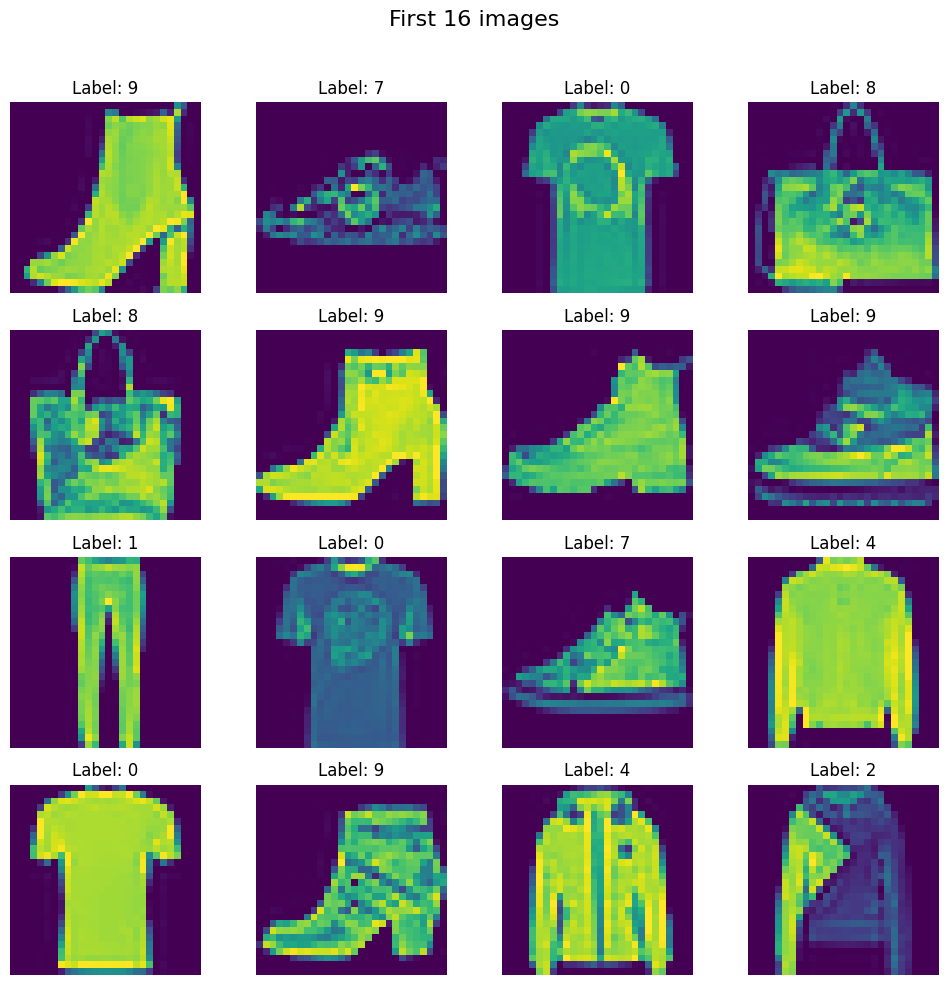

Epoch 1 loss: 1.3216368440786999
Epoch 2 loss: 0.7793365436792373
Epoch 3 loss: 0.6427524652083715
Epoch 4 loss: 0.5751657336950302
Epoch 5 loss: 0.528180201848348
Epoch 6 loss: 0.49528750121593473
Epoch 7 loss: 0.4602432996034622
Epoch 8 loss: 0.4359459094206492
Epoch 9 loss: 0.41829214423894884
Epoch 10 loss: 0.3984092291692893
Epoch 11 loss: 0.3850264506538709
Epoch 12 loss: 0.3722685620188713
Epoch 13 loss: 0.3477362078428268
Epoch 14 loss: 0.3467242218057315
Epoch 15 loss: 0.3138812760512034
Epoch 16 loss: 0.3126461291313171
Epoch 17 loss: 0.29552092105150224
Epoch 18 loss: 0.2857150869568189
Epoch 19 loss: 0.27084775785605114
Epoch 20 loss: 0.26237100958824155
Epoch 21 loss: 0.25756089876095456
Epoch 22 loss: 0.24232648963729542
Epoch 23 loss: 0.23957946779827277
Epoch 24 loss: 0.2261324493587017
Epoch 25 loss: 0.2233684351791938
Epoch 26 loss: 0.21165308925012746
Epoch 27 loss: 0.21910773759086927
Epoch 28 loss: 0.21103892110288144
Epoch 29 loss: 0.18156708138684433
Epoch 30 los

In [ ]:
# imports
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# set random seed for reproducibility
torch.manual_seed(42)

# connecting to google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive')

# loading the data from fmnist_small.csv
df = pd.read_csv("/content/drive/My Drive/fmnist_small.csv")

#print(df.head())

# create 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10,10))
fig.suptitle("First 16 images", fontsize=16)

# plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28, 28) # reshape to 28x28
  ax.imshow(img) # Display in greyscale
  ax.axis('off') # Remove axis for a cleaner look
  ax.set_title(f"Label: {df.iloc[i, 0]}") # show the label

# adjusting layout to fit the title
plt.tight_layout(rect=[0, 0, 1, .96])
plt.show()

# train test split
X = df.iloc[:, 1:].values # all columns except 1st/0th column
y = df.iloc[:, 0].values  # 1st/0th column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the features to be within 0,1
X_train = X_train / 255.0
X_test = X_test / 255.0

# create CustomDataset class
class CustomDataset(Dataset):

  # constructor to create the custom dataset
  def __init__(self, features, labels):

    # pytorch requires features to be in float32
    self.features = torch.tensor(features, dtype=torch.float32)

    # pytorch requires labels to be in long
    self.labels = torch.tensor(labels, dtype=torch.long)

  # to return the length of the dataset
  def __len__(self):
    #return len(self.features)
    return self.features.shape[0]

  # to return the row at a specific index in the dataset
  def __getitem__(self, index):
    return self.features[index], self.labels[index]

# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)
#print(len(train_dataset)) # should be 4800

# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)
#print(len(test_dataset))

# create train and test loader objects
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# shuffling off for test loader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# create network class
class MyMLP(nn.Module):

  # constructure of the network which takes number of features as arguments
  def __init__(self, num_features):

    # invoke the constructer of the base/parent class
    super().__init__()

    # define the architecture of the network here
    self.model = nn.Sequential(
        nn.Linear(in_features=num_features, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=10),
        #nn.Softmax()
        # explicit addition of softmax activation is not required in pytorch
        # because cross entropy loss function in pytorch
        # internally has softmax implemented within it
    )

  # defining forward pass
  def forward(self, x):
    return self.model(x)

# parameters setup
epochs = 100
learning_rate = 0.1

# instantiate the model
model = MyMLP(X_train.shape[1]) # passing the number of features as arg

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(params=model.parameters(), lr=learning_rate)

# training pipeline
for epoch in range(epochs):

  total_epoch_loss = 0

  # mini-batch gradient descent
  for batch_features, batch_labels in train_loader:

    # forward pass
    y_pred = model(batch_features)

    # loss calculation
    loss = criterion(y_pred, batch_labels)

    # flush the gradients
    optimizer.zero_grad()

    # backward pass / back-propagation
    loss.backward() # this will calculate the gradients

    # update parameters using calculated gradients
    optimizer.step()

    # epoch loss addition
    total_epoch_loss += loss.item()

  # average loss in each epoch
  print(f"Epoch {epoch + 1} loss: {total_epoch_loss/len(train_loader)}")

# set the model to evaluation mode
# if we have dropouts in our network
# then on each run/train some neurons are turned off
# but during evaluation we want all the neurons to participate
# model.eval() enforces evaluation behavior which is different than training behavior
# if we have batch normalization in our network
# then on each run it calculated some statistics and uses it
# but during evaluation we don't want that to happen
# model.eval() enforces evaluation behavior which is different than training behavior
model.eval()

# evaluation code
total = 0
correct = 0

# to run without tracking the gradient functions
with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    # forward pass
    y_pred = model(batch_features)
    _,predicted_class = torch.max(y_pred, 1)
    total += batch_labels.shape[0]
    correct += (batch_labels == predicted_class).sum().item()
print(f"Accuracy of the model: {correct/total}")

# 18. Using the GPU on entire fashion MNIST dataset using the same MLP mmodel developed above

In [ ]:
import torch

# checking gpu availability
if torch.cuda.is_available():
  print("GPU is available!")
  print(f"Using GPU: {torch.cuda.get_device_name(0)}")
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
  print("GPU not available. Using CPU.")

print(device)

GPU is available!
Using GPU: Tesla T4
cuda


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


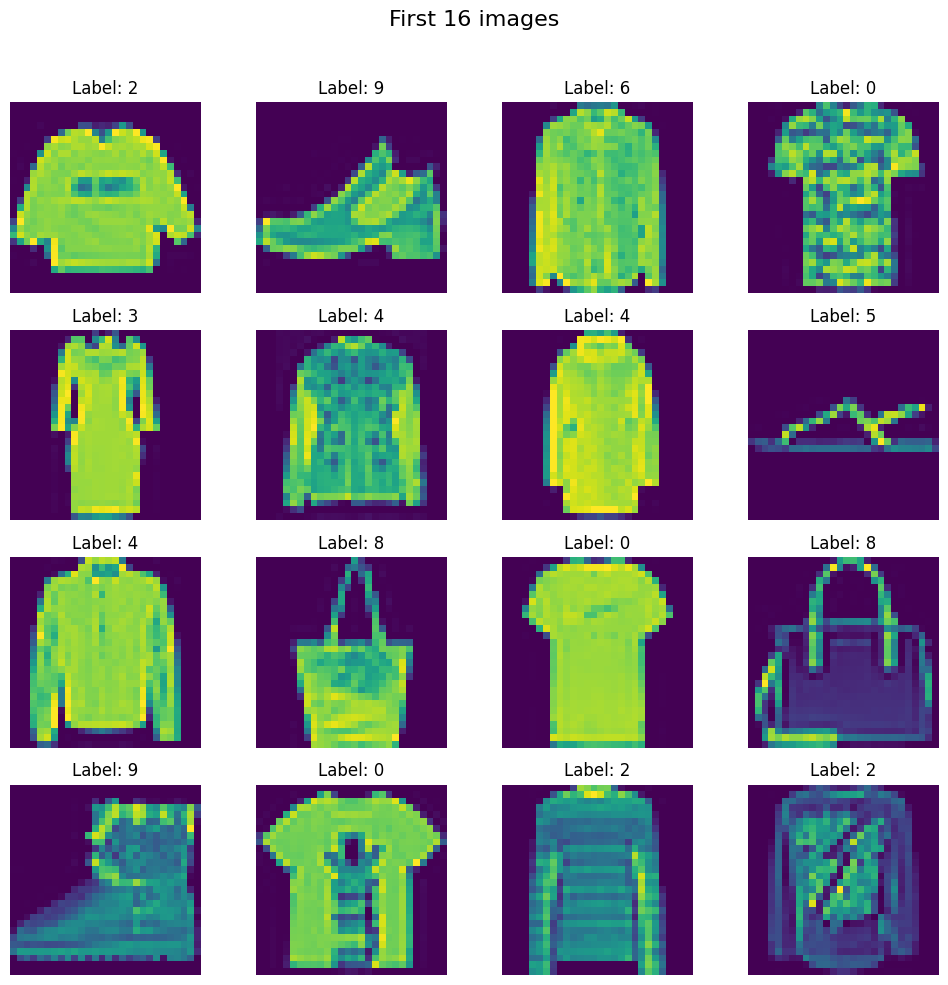

Epoch 1 loss: 0.8320518864878713
Epoch 2 loss: 0.5017581857852081
Epoch 3 loss: 0.4452278288061431
Epoch 4 loss: 0.4077278306997661
Epoch 5 loss: 0.38393580961202
Epoch 6 loss: 0.36481002417962943
Epoch 7 loss: 0.3523371454113836
Epoch 8 loss: 0.3380365246521639
Epoch 9 loss: 0.3284280890150111
Epoch 10 loss: 0.31588309558469857
Epoch 11 loss: 0.30972940323830667
Epoch 12 loss: 0.30169369391540984
Epoch 13 loss: 0.2951198465534365
Epoch 14 loss: 0.2866168478404535
Epoch 15 loss: 0.28069227485895665
Epoch 16 loss: 0.27417406614528284
Epoch 17 loss: 0.2689129319081683
Epoch 18 loss: 0.26144263275396595
Epoch 19 loss: 0.2572237991574985
Epoch 20 loss: 0.25110509481702026
Epoch 21 loss: 0.24843462960107493
Epoch 22 loss: 0.24182336982379335
Epoch 23 loss: 0.23898788471656568
Epoch 24 loss: 0.23390073260900054
Epoch 25 loss: 0.23088505071427015
Epoch 26 loss: 0.22601476217955668
Epoch 27 loss: 0.2235402963849019
Epoch 28 loss: 0.21840820088188276
Epoch 29 loss: 0.2139179246353188
Epoch 30 l

In [ ]:
# imports
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# set random seed for reproducibility
torch.manual_seed(42)

# connecting to google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive')

# loading the data from fmnist_small.csv
df_train = pd.read_csv("/content/drive/My Drive/fmnist_train.csv")
df_test = pd.read_csv("/content/drive/My Drive/fmnist_test.csv")

#print(df.head())

# create 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10,10))
fig.suptitle("First 16 images", fontsize=16)

# plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
  img = df_train.iloc[i,1:].values.reshape(28, 28) # reshape to 28x28
  ax.imshow(img) # Display in greyscale
  ax.axis('off') # Remove axis for a cleaner look
  ax.set_title(f"Label: {df_train.iloc[i, 0]}") # show the label

# adjusting layout to fit the title
plt.tight_layout(rect=[0, 0, 1, .96])
plt.show()

# train test split
X_train = df_train.iloc[:, 1:].values # all columns except 1st/0th column
y_train = df_train.iloc[:, 0].values  # 1st/0th column

X_test = df_test.iloc[:, 1:].values # all columns except 1st/0th column
y_test = df_test.iloc[:, 0].values  # 1st/0th column


# scaling the features to be within 0,1
X_train = X_train / 255.0
X_test = X_test / 255.0

# create CustomDataset class
class CustomDataset(Dataset):

  # constructor to create the custom dataset
  def __init__(self, features, labels):

    # pytorch requires features to be in float32
    self.features = torch.tensor(features, dtype=torch.float32)

    # pytorch requires labels to be in long
    self.labels = torch.tensor(labels, dtype=torch.long)

  # to return the length of the dataset
  def __len__(self):
    #return len(self.features)
    return self.features.shape[0]

  # to return the row at a specific index in the dataset
  def __getitem__(self, index):
    return self.features[index], self.labels[index]

# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)
#print(len(train_dataset)) # should be 4800

# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)
#print(len(test_dataset))

# create train and test loader objects
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, pin_memory=True, num_workers=2)
# keep shuffling off for test loader
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, pin_memory=True, num_workers=2)
# pin_memory=True makes the data to be stored in pinned memory,
# instead of paged memory
# this saves the time at execution of shfiting data from paged to pinned memory


# create network class
class MyMLP(nn.Module):

  # constructure of the network which takes number of features as arguments
  def __init__(self, num_features):

    # invoke the constructer of the base/parent class
    super().__init__()

    # define the architecture of the network here
    self.model = nn.Sequential(
        nn.Linear(in_features=num_features, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=10),
        #nn.Softmax()
        # explicit addition of softmax activation is not required in pytorch
        # because cross entropy loss function in pytorch
        # internally has softmax implemented within it
    )

  # defining forward pass
  def forward(self, x):
    return self.model(x)

# parameters setup
epochs = 100
learning_rate = 0.1

# instantiate the model
model = MyMLP(X_train.shape[1]) # passing the number of features as arg

# moving the model to GPU
model = model.to(device)

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(params=model.parameters(), lr=learning_rate)

# training pipeline
for epoch in range(epochs):

  total_epoch_loss = 0

  # mini-batch gradient descent
  for batch_features, batch_labels in train_loader:

    # move the data to GPU
    batch_features= batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # forward pass
    y_pred = model(batch_features)

    # loss calculation
    loss = criterion(y_pred, batch_labels)

    # flush the gradients
    optimizer.zero_grad()

    # backward pass / back-propagation
    loss.backward() # this will calculate the gradients

    # update parameters using calculated gradients
    optimizer.step()

    # epoch loss addition
    total_epoch_loss += loss.item()

  # average loss in each epoch
  print(f"Epoch {epoch + 1} loss: {total_epoch_loss/len(train_loader)}")

In [ ]:
# set the model to evaluation mode
# if we have dropouts in our network
# then on each run/train some neurons are turned off
# but during evaluation we want all the neurons to participate
# model.eval() enforces evaluation behavior which is different than training behavior
# if we have batch normalization in our network
# then on each run it calculated some statistics and uses it
# but during evaluation we don't want that to happen
# model.eval() enforces evaluation behavior which is different than training behavior
model.eval()

# evaluation code
total = 0
correct = 0

# to run without tracking the gradient functions
with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    # move the data to GPU
    batch_features= batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # forward pass
    y_pred = model(batch_features)
    _,predicted_class = torch.max(y_pred, 1)
    total += batch_labels.shape[0]
    correct += (batch_labels == predicted_class).sum().item()
print(f"Accuracy of the model on test data: {correct/total}")

# evaluation code
total = 0
correct = 0

# to run without tracking the gradient functions
with torch.no_grad():
  for batch_features, batch_labels in train_loader:

    # move the data to GPU
    batch_features= batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # forward pass
    y_pred = model(batch_features)
    _,predicted_class = torch.max(y_pred, 1)
    total += batch_labels.shape[0]
    correct += (batch_labels == predicted_class).sum().item()
print(f"Accuracy of the model on train data: {correct/total}")

Accuracy of the model on test data: 0.8713
Accuracy of the model on train data: 0.9405833333333333


# 19. Optimizations

[lecture 9](https://www.youtube.com/watch?v=7smLlJ8oj4o&list=PLKnIA16_Rmvboy8bmDCjwNHgTaYH2puK7&index=9)

**Dropouts**
- Applied to the hidden layers
- Applied after the ReLU activation function
- Randomly turns off p% neurons in the hidden layer during each forward pass
- This has a regularization effect
- During evaluation dropout is not used
- nn.Dropout(p=)

**Batch Normalization**
- nn.batchNorm1D()

**L2-regularization**
-

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


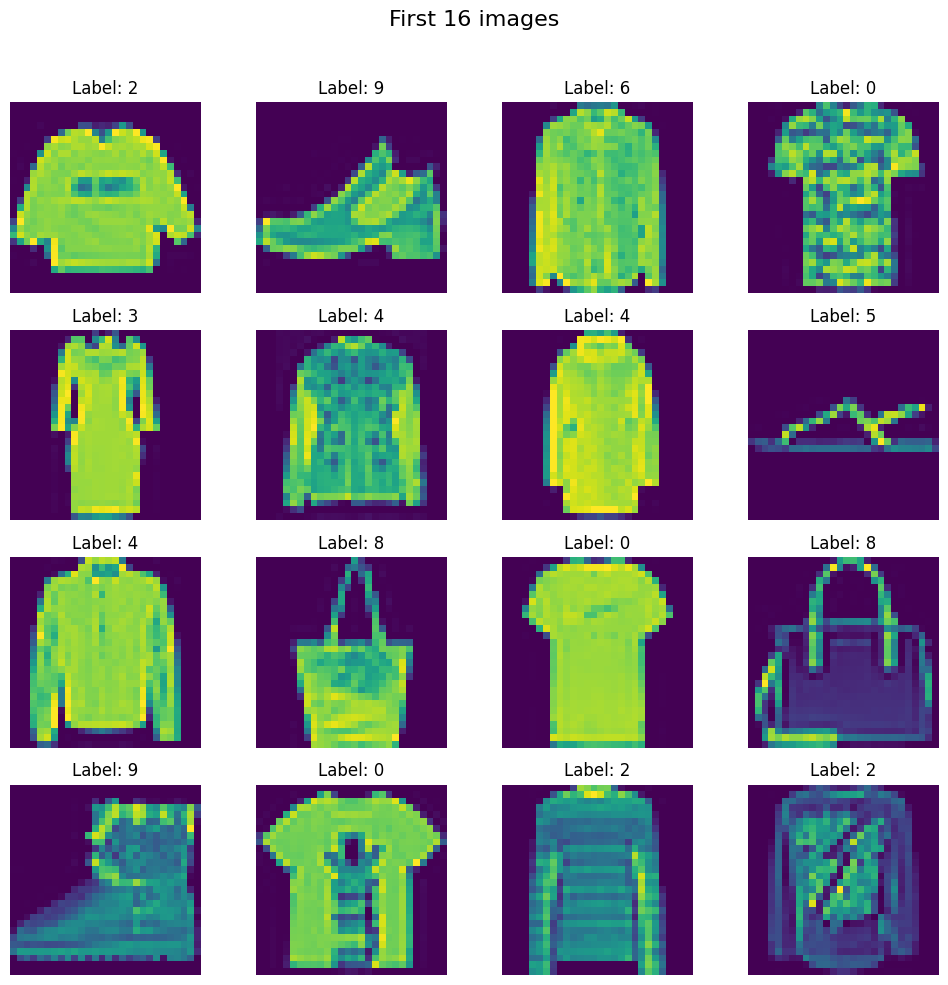

Epoch 1 loss: 0.6332025591498499
Epoch 2 loss: 0.4713677552971504
Epoch 3 loss: 0.4306247016069477
Epoch 4 loss: 0.4053630803439663
Epoch 5 loss: 0.3880869724603096
Epoch 6 loss: 0.3757582092399536
Epoch 7 loss: 0.3653395939419773
Epoch 8 loss: 0.35228954970455373
Epoch 9 loss: 0.346660172411882
Epoch 10 loss: 0.3375610649776357
Epoch 11 loss: 0.33719158830291934
Epoch 12 loss: 0.324144686494809
Epoch 13 loss: 0.3186852351180526
Epoch 14 loss: 0.3181368979309668
Epoch 15 loss: 0.3120345461533776
Epoch 16 loss: 0.30176891580319354
Epoch 17 loss: 0.30199464119827824
Epoch 18 loss: 0.2972175811590162
Epoch 19 loss: 0.2930078647856011
Epoch 20 loss: 0.28790363437458394
Epoch 21 loss: 0.2876099247032645
Epoch 22 loss: 0.2838315256813696
Epoch 23 loss: 0.2824035915357472
Epoch 24 loss: 0.27452918588479697
Epoch 25 loss: 0.27367353398027194
Epoch 26 loss: 0.2732595296810939
Epoch 27 loss: 0.26913304236143637
Epoch 28 loss: 0.2673099422251492
Epoch 29 loss: 0.2627567062055124
Epoch 30 loss: 0.

In [ ]:
# imports
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# set random seed for reproducibility
torch.manual_seed(42)

# connecting to google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive')

# loading the data from fmnist_small.csv
df_train = pd.read_csv("/content/drive/My Drive/fmnist_train.csv")
df_test = pd.read_csv("/content/drive/My Drive/fmnist_test.csv")

#print(df.head())

# create 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10,10))
fig.suptitle("First 16 images", fontsize=16)

# plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
  img = df_train.iloc[i,1:].values.reshape(28, 28) # reshape to 28x28
  ax.imshow(img) # Display in greyscale
  ax.axis('off') # Remove axis for a cleaner look
  ax.set_title(f"Label: {df_train.iloc[i, 0]}") # show the label

# adjusting layout to fit the title
plt.tight_layout(rect=[0, 0, 1, .96])
plt.show()

# train test split
X_train = df_train.iloc[:, 1:].values # all columns except 1st/0th column
y_train = df_train.iloc[:, 0].values  # 1st/0th column

X_test = df_test.iloc[:, 1:].values # all columns except 1st/0th column
y_test = df_test.iloc[:, 0].values  # 1st/0th column


# scaling the features to be within 0,1
X_train = X_train / 255.0
X_test = X_test / 255.0

# create CustomDataset class
class CustomDataset(Dataset):

  # constructor to create the custom dataset
  def __init__(self, features, labels):

    # pytorch requires features to be in float32
    self.features = torch.tensor(features, dtype=torch.float32)

    # pytorch requires labels to be in long
    self.labels = torch.tensor(labels, dtype=torch.long)

  # to return the length of the dataset
  def __len__(self):
    #return len(self.features)
    return self.features.shape[0]

  # to return the row at a specific index in the dataset
  def __getitem__(self, index):
    return self.features[index], self.labels[index]

# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)
#print(len(train_dataset)) # should be 4800

# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)
#print(len(test_dataset))

# create train and test loader objects
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, pin_memory=True, num_workers=2)
# keep shuffling off for test loader
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, pin_memory=True, num_workers=2)
# pin_memory=True makes the data to be stored in pinned memory,
# instead of paged memory
# this saves the time at execution of shfiting data from paged to pinned memory


# create network class
class MyMLP(nn.Module):

  # constructure of the network which takes number of features as arguments
  def __init__(self, num_features):

    # invoke the constructer of the base/parent class
    super().__init__()

    # define the architecture of the network here
    self.model = nn.Sequential(
        nn.Linear(in_features=num_features, out_features=128),
        # below line adds batch normalization
        # argument = no. of neurons in the current layer
        nn.BatchNorm1d(128),
        nn.ReLU(),
        # below line adds a dropout of 30% at this layer
        nn.Dropout(p=0.3),
        nn.Linear(in_features=128, out_features=64),
        # below line adds batch normalization
        # argument = no. of neurons in the current layer
        nn.BatchNorm1d(64),
        nn.ReLU(),
        # below line adds a dropout of 30% at this layer
        nn.Dropout(p=0.3),
        nn.Linear(in_features=64, out_features=10),
        #nn.Softmax()
        # explicit addition of softmax activation is not required in pytorch
        # because cross entropy loss function in pytorch
        # internally has softmax implemented within it
    )

  # defining forward pass
  def forward(self, x):
    return self.model(x)

# parameters setup
epochs = 100
learning_rate = 0.1

# instantiate the model
model = MyMLP(X_train.shape[1]) # passing the number of features as arg

# moving the model to GPU
model = model.to(device)

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(params=model.parameters(), lr=learning_rate, weight_decay=1e-4)
# 1e-4 = 10 ** -4

# training pipeline
for epoch in range(epochs):

  total_epoch_loss = 0

  # mini-batch gradient descent
  for batch_features, batch_labels in train_loader:

    # move the data to GPU
    batch_features= batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # forward pass
    y_pred = model(batch_features)

    # loss calculation
    loss = criterion(y_pred, batch_labels)

    # flush the gradients
    optimizer.zero_grad()

    # backward pass / back-propagation
    loss.backward() # this will calculate the gradients

    # update parameters using calculated gradients
    optimizer.step()

    # epoch loss addition
    total_epoch_loss += loss.item()

  # average loss in each epoch
  print(f"Epoch {epoch + 1} loss: {total_epoch_loss/len(train_loader)}")


# set the model to evaluation mode
# if we have dropouts in our network
# then on each run/train some neurons are turned off
# but during evaluation we want all the neurons to participate
# model.eval() enforces evaluation behavior which is different than training behavior
# if we have batch normalization in our network
# then on each run it calculated some statistics and uses it
# but during evaluation we don't want that to happen
# model.eval() enforces evaluation behavior which is different than training behavior
model.eval()

# evaluation code
total = 0
correct = 0

# to run without tracking the gradient functions
with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    # move the data to GPU
    batch_features= batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # forward pass
    y_pred = model(batch_features)
    _,predicted_class = torch.max(y_pred, 1)
    total += batch_labels.shape[0]
    correct += (batch_labels == predicted_class).sum().item()
print(f"Accuracy of the model on test data: {correct/total}")

# evaluation code
total = 0
correct = 0

# to run without tracking the gradient functions
with torch.no_grad():
  for batch_features, batch_labels in train_loader:

    # move the data to GPU
    batch_features= batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # forward pass
    y_pred = model(batch_features)
    _,predicted_class = torch.max(y_pred, 1)
    total += batch_labels.shape[0]
    correct += (batch_labels == predicted_class).sum().item()
print(f"Accuracy of the model on train data: {correct/total}")

# 20. RNNs using PyTorch




1.   Load dataset
2.   Generate embeddings
3.   Build RNN architecture
4.   Train on data
5.   Predictions



In [ ]:
# imports
import pandas as pd
import torch.optim as optim
from sklearn.model_selection import train_test_split

# set random seed for reproducibility
torch.manual_seed(42)

# connecting to google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive')

# loading the data from fmnist_small.csv
df = pd.read_csv("/content/drive/My Drive/100_Unique_QA_Dataset.csv")

#print(df.head())


# converting the textual data to numerical data
# tokenize
def tokenize(text):
  text = text.lower()
  text = text.replace("?","")
  text = text.replace("'","")
  return text.split()

# vocabulary formation
vocab = {'<UNK>': 0}
def build_vocab(row):
  tokenized_q = tokenize(row['question'])
  tokenized_a = tokenize(row['answer'])

  merged_tokens = tokenized_q + tokenized_a

  for token in merged_tokens:
    if token not in vocab:
      vocab[token] = len(vocab)

df.apply(build_vocab, axis=1)
#print(vocab)

# convert words to numbers
def text_to_indices(text, vocab):
  indexed_text = []
  for token in tokenize(text):
    if token in vocab:
      indexed_text.append(vocab[token])
    else:
      indexed_text.append(0)
  return indexed_text
#print(text_to_indices("what is PyTorch", vocab))

import torch
from torch.utils.data import Dataset, DataLoader

# create CustomDataset class
class QADataset(Dataset):

  # constructor to create the custom dataset
  def __init__(self, df, vocab):
    self.df = df
    self.vocab = vocab

  # to return the length of the dataset
  def __len__(self):
    return self.df.shape[0]

  # to return the row at a specific index in the dataset
  def __getitem__(self, index):
    num_q = text_to_indices(self.df.iloc[index]['question'], self.vocab)
    num_a = text_to_indices(self.df.iloc[index]['answer'], self.vocab)
    return torch.tensor(num_q), torch.tensor(num_a)

# create train_dataset object
dataset = QADataset(df, vocab)
dataset[0]

# create train dataloader objects
dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)

import torch.nn as nn
# architecture of RNN
# create network class
class MyRNN(nn.Module):

  # constructure of the network which takes number of features as arguments
  def __init__(self, vocab_size):

    # invoke the constructer of the base/parent class
    super().__init__()

    # creating an embedding layer to create embeddings for each sentence
    self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=50)

    # define the architecture of the RNN here
    self.model = nn.RNN(input_size=50, hidden_size=64, batch_first=True)
    # output layer
    self.fullyConnectedLayer = nn.Linear(in_features=64, out_features=vocab_size)

  # defining forward pass
  def forward(self, q):
    eq = self.embedding(q)
    hidden, final = self.model(eq)
    output = self.fullyConnectedLayer(final.squeeze(0))
    return output

# parameters setup
epochs = 20
learning_rate = 0.001

# instantiate the model
model = MyRNN(len(vocab))

# moving the model to GPU
#model = model.to(device)

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.Adam(params=model.parameters(), lr=learning_rate)

# training pipeline
for epoch in range(epochs):

  total_epoch_loss = 0


  for q, a in dataloader:

    # flush the gradients
    optimizer.zero_grad()

    # forward pass
    y_pred = model(q)

    # loss calculation
    loss = criterion(y_pred, a[0])

    # backward pass / back-propagation
    loss.backward() # this will calculate the gradients

    # update parameters using calculated gradients
    optimizer.step()

    # epoch loss addition
    total_epoch_loss += loss.item()

  # average loss in each epoch
  print(f"Epoch {epoch + 1} loss: {total_epoch_loss/len(dataloader)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1 loss: 5.807304090923733
Epoch 2 loss: 5.042532036039565
Epoch 3 loss: 4.1631626870897085
Epoch 4 loss: 3.4861484355396692
Epoch 5 loss: 2.9103642874293856
Epoch 6 loss: 2.376625037855572
Epoch 7 loss: 1.8850713319248624
Epoch 8 loss: 1.46121327843931
Epoch 9 loss: 1.1190572943952348
Epoch 10 loss: 0.8476320866081449
Epoch 11 loss: 0.6541618376970291
Epoch 12 loss: 0.5068092417385843
Epoch 13 loss: 0.40322100586361354
Epoch 14 loss: 0.3261686795287662
Epoch 15 loss: 0.2665705830686622
Epoch 16 loss: 0.22147809854812092
Epoch 17 loss: 0.18679873430066637
Epoch 18 loss: 0.16014703487356505
Epoch 19 loss: 0.1367866607175933
Epoch 20 loss: 0.11840666967133681


# 21. Trying multiple class inheritence in a network alongwith nn.Module

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from abc import abstractmethod

# fetch the dataset
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')

# drop the unnecessary columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2)

# scaling the values to make it ready for neural network feeding
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# label encoding from string names to numbers
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# converting numPy arrays to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).float()
y_test_tensor = torch.from_numpy(y_test).float()
#print(X_train_tensor.dtype)

# create a custom dataset class
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):

  # constructor to create the custom dataset
  def __init__(self, features, labels):
    self.features = features
    self.labels = labels

  # to return the length of the dataset
  def __len__(self):
    return self.features.shape[0]

  # to return the row at a specific index in the dataset
  def __getitem__(self, index):
    return self.features[index], self.labels[index]

# creating train & test objects of CustomDataset class
train_dataset = CustomDataset(features=X_train_tensor, labels=y_train_tensor)
test_dataset = CustomDataset(features=X_test_tensor, labels=y_test_tensor)

# creating train and test dataloaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

# creating a base class
class BaseNet():
  """Abstract base class for PyTorch deep learning networks."""

  @abstractmethod
  def forward(self, input, **kwargs):
      """Define the forward pass in the network.

      Parameters
      ----------
      input : tensor
          The input data fed into the input layer

      Returns
      -------
      output : tensor
          The output data produced by the network,
          it could represent predictions, features,
          or any transformed data depending on the network's purpose
          (e.g., logits for classification,
          reconstructed data for autoencoders, etc.).
          The exact shape and meaning of the output tensor
          depend on the network architecture and the task.
      """
      ...



# creating the model class
class SNNModel(nn.Module, BaseNet):

  def __init__(self, num_features):

    # invoking the parent class constructor
    super().__init__()

    # single neuron layer, perceptron
    self.layer = nn.Linear(in_features=num_features, out_features=1)

    # activaiton function
    self.activation = nn.Sigmoid()

  def forward(self, features):

    # running through the layer
    out = self.layer(features)

    # passing through the activation function
    out = self.activation(out)

    return out

# setup for training pipeline
# here we are doing mini-batch gradient descent

# defining the parameters
learning_rate = 0.1
epochs = 25
batch_size = 32
n_samples = len(X_train_tensor)

# create the model
model = SNNModel(X_train_tensor.shape[1]) # arg = number of features

# defining optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# defining the loss function
loss_function = nn.BCELoss()

# training pipeline
for epoch in range(epochs):

  # using DataLoader class for mini-batch GD
  for batch_features, batch_labels in train_loader:

    # forward pass
    y_pred = model(batch_features)

    # loss calculation
    # reshape batch_labels to match y_pred's shape
    loss = loss_function(y_pred, batch_labels.unsqueeze(1))

    # clear gradients
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # parameters updation
    optimizer.step()

  # print loss in each epoch
  print(f"Epoch: {epoch + 1}, Loss: {loss.item()}")

# model evaluation using DataLoader class
model.eval() # sets the model to evaluation mode
accuracy_list = []

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    # forward pass
    y_pred = model(batch_features)
    y_pred = (y_pred > 0.5).float() # convert probabilities to binary predictions

    # calculate accuracy for current batch
    batch_accuracy = (y_pred.unsqueeze(1) == batch_labels).float().mean()
    accuracy_list.append(batch_accuracy)

# calculate overall accuracy
overall_accuracy = sum(accuracy_list)/len(accuracy_list)
print(f"Accuracy: {overall_accuracy.item()}")

Epoch: 1, Loss: 0.12674884498119354
Epoch: 2, Loss: 0.13458169996738434
Epoch: 3, Loss: 0.34255069494247437
Epoch: 4, Loss: 0.07361936569213867
Epoch: 5, Loss: 0.08901228755712509
Epoch: 6, Loss: 0.06924562156200409
Epoch: 7, Loss: 0.03633377328515053
Epoch: 8, Loss: 0.05975295230746269
Epoch: 9, Loss: 0.10973835736513138
Epoch: 10, Loss: 0.07689330726861954
Epoch: 11, Loss: 0.15353170037269592
Epoch: 12, Loss: 0.03712707757949829
Epoch: 13, Loss: 0.028567850589752197
Epoch: 14, Loss: 0.2996513247489929
Epoch: 15, Loss: 0.058688100427389145
Epoch: 16, Loss: 0.09734749048948288
Epoch: 17, Loss: 0.021213287487626076
Epoch: 18, Loss: 0.018739376217126846
Epoch: 19, Loss: 0.4389530122280121
Epoch: 20, Loss: 0.09367755800485611
Epoch: 21, Loss: 0.00854618102312088
Epoch: 22, Loss: 0.12743161618709564
Epoch: 23, Loss: 0.03130514174699783
Epoch: 24, Loss: 0.04543492570519447
Epoch: 25, Loss: 0.013930169865489006
Accuracy: 0.5542775988578796
